In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, Imputer

label = LabelEncoder()
%matplotlib inline

train_df = pd.read_csv("Titanic/Dataset/train.csv")
test_df = pd.read_csv("Titanic/Dataset/test.csv")

test_df.Fare.fillna(test_df.Fare.mean(), inplace=True)
data_df = train_df.append(test_df)

passenger_id = test_df.PassengerId

train_df.drop(['PassengerId'], axis=1, inplace=True)
test_df.drop(['PassengerId'], axis=1, inplace=True)

train_df.Sex = train_df.Sex.apply(lambda x: 0 if x == "female" else 1)
test_df.Sex = test_df.Sex.apply(lambda x: 0 if x == "female" else 1)

for name_string in data_df['Name']:
    data_df['Title']=data_df['Name'].str.extract('([A-Za-z]+)\.',expand=True)
    

#replacing the rare title with more common one.
mapping = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr', 'Don': 'Mr', 'Mme': 'Miss',
          'Jonkheer': 'Mr', 'Lady': 'Mrs', 'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}
data_df.replace({'Title': mapping}, inplace=True)

data_df['Title'].value_counts()
train_df['Title']=data_df['Title'][:891]
test_df['Title']=data_df['Title'][891:]

titles=['Mr','Miss','Mrs','Master','Rev','Dr']
for title in titles:
    age_to_impute = data_df.groupby('Title')['Age'].median()[titles.index(title)]
    #print(age_to_impute)
    data_df.loc[(data_df['Age'].isnull()) & (data_df['Title'] == title), 'Age'] = age_to_impute
data_df.isnull().sum()



train_df['Age']=data_df['Age'][:891]
test_df['Age']=data_df['Age'][891:]
test_df.isnull().sum()

# train_df.describe()
# train_df.head()

# print(train_df)

# train_df.groupby('Survived').median()
train_df.groupby('Pclass').median()


,Survived,Sex,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,1,1,38.0,0,0,60.2875
2,0,1,30.0,0,0,14.2500
3,0,1,26.0,0,0,8.0500


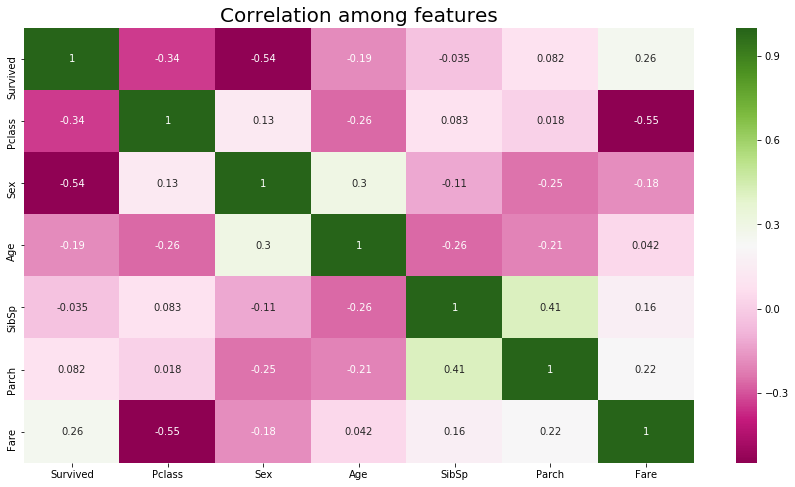

In [2]:
train_df.corr()

plt.subplots(figsize=(15,8))
sns.heatmap(train_df.corr(), annot=True, cmap="PiYG")
plt.title("Correlation among features", fontsize=20)

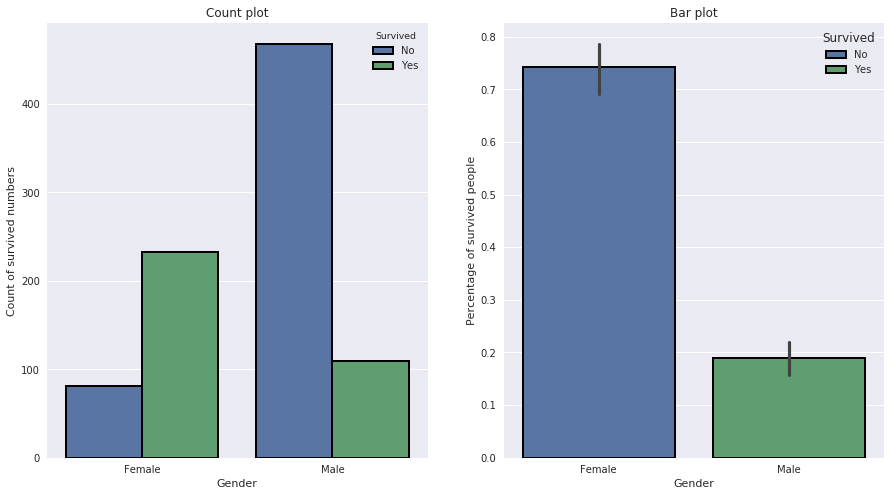

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(15,8))
axes = axes.ravel()
sns.set(style='darkgrid')
sns.countplot(x="Sex", hue="Survived", data=train_df, edgecolor=(0,0,0), linewidth=2, ax=axes[0])
axes[0].set_title('Count plot')
axes[0].set(xlabel='Gender', ylabel='Count of survived numbers')
labels = ["Female", "Male"]
leg = axes[0].get_legend()
# leg.set_title('Survived')
legs = leg.texts

# Get patches for legend, aka legend_key
patches = leg.get_patches()


legs[0].set_text('No')
legs[1].set_text('Yes')
axes[0].set_xticklabels(labels)

# for i, v in s.reset_index().iterrows():
#     axes[0].text(i, v.umpires + 0.2 , v.umpires, color='red')

sns.barplot(x="Sex", y="Survived", data=train_df, edgecolor=(0,0,0), linewidth=2, ax=axes[1])
axes[1].set_title('Bar plot')
axes[1].set(xlabel='Gender', ylabel='Percentage of survived people')
axes[1].set_xticklabels(labels)

# Init a new legend with the same properties with the first axes
axes[1].legend(patches, ['No', 'Yes'])
leg = axes[1].get_legend()
leg.set_title('Survived')
legs = leg.texts
legs[0].set_text('No')
legs[1].set_text('Yes')


# plt.xticks(sorted(train_df.Sex.unique()), labels)
# plt.subplots(figsize=(15,8))
# sns.barplot(x="Sex", y="Survived", data=train_df, edgecolor=(0,0,0), linewidth=2)
# plt.title("Survived/Non-survived Passenger Gender Distribution", fontsize=25)

# plt.ylabel("% passenger survived", fontsize=15)
# plt.xlabel("Gender", fontsize=15)
# plt.xticks(sorted(train_df.Sex.unique()), labels)


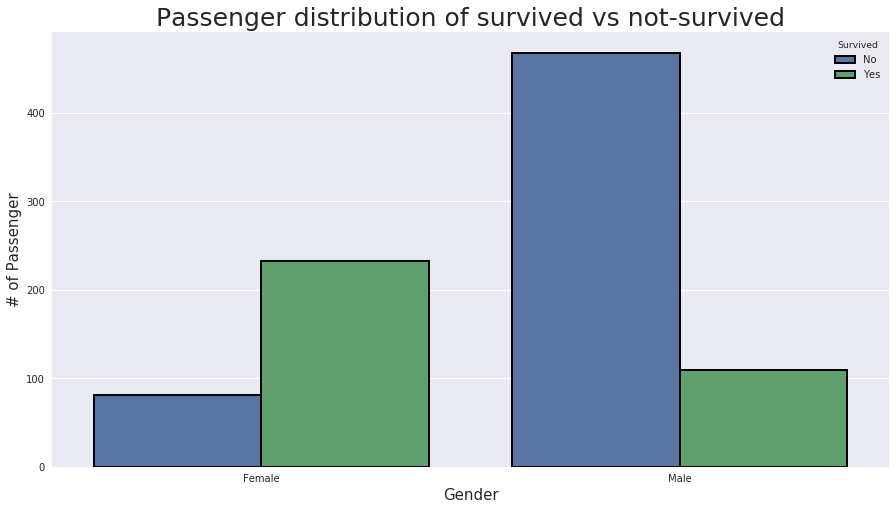

In [4]:
train_df.head()

sns.set(style='darkgrid')
plt.subplots(figsize=(15,8))
ax = sns.countplot(x='Sex', data=train_df, hue='Survived', edgecolor=(0,0,0), linewidth=2)
train_df.shape

plt.title('Passenger distribution of survived vs not-survived', fontsize=25)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('# of Passenger', fontsize=15)

labels = ['Female', 'Male']
plt.xticks(sorted(train_df.Survived.unique()),labels)

leg = ax.get_legend()
leg.set_title('Survived')
legs = leg.texts
legs[0].set_text('No')
legs[1].set_text('Yes')


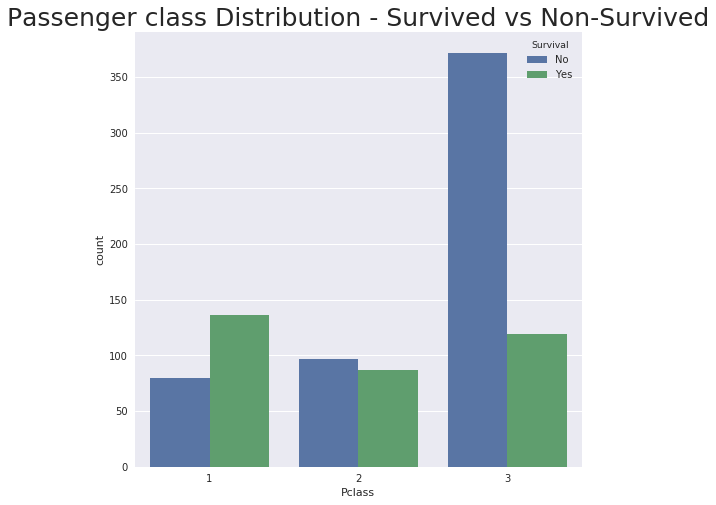

In [5]:
plt.subplots(figsize=(8,8))
ax = sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title("Passenger class Distribution - Survived vs Non-Survived", fontsize=25)

leg = ax.get_legend()
leg.set_title('Survival')
legs = leg.texts

legs[0].set_text('No')
legs[1].set_text('Yes')

([<matplotlib.axis.XTick at 0x7f72f5f46198>,
 <a list of 3 Text xticklabel objects>)

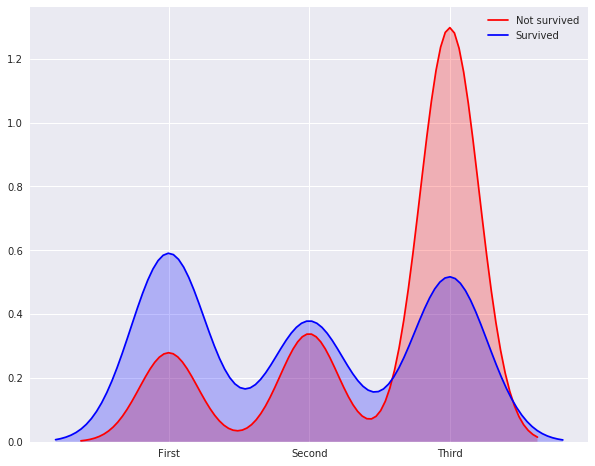

In [6]:
plt.subplots(figsize=(10,8))
sns.kdeplot(train_df.loc[(train_df['Survived'] == 0), 'Pclass'], shade=True, color='r', label='Not survived')
ax = sns.kdeplot(train_df.loc[(train_df['Survived'] == 1), 'Pclass'], shade=True, color='b', label='Survived')
labels = ['First', 'Second', 'Third']
plt.xticks(sorted(train_df.Pclass.unique()), labels)





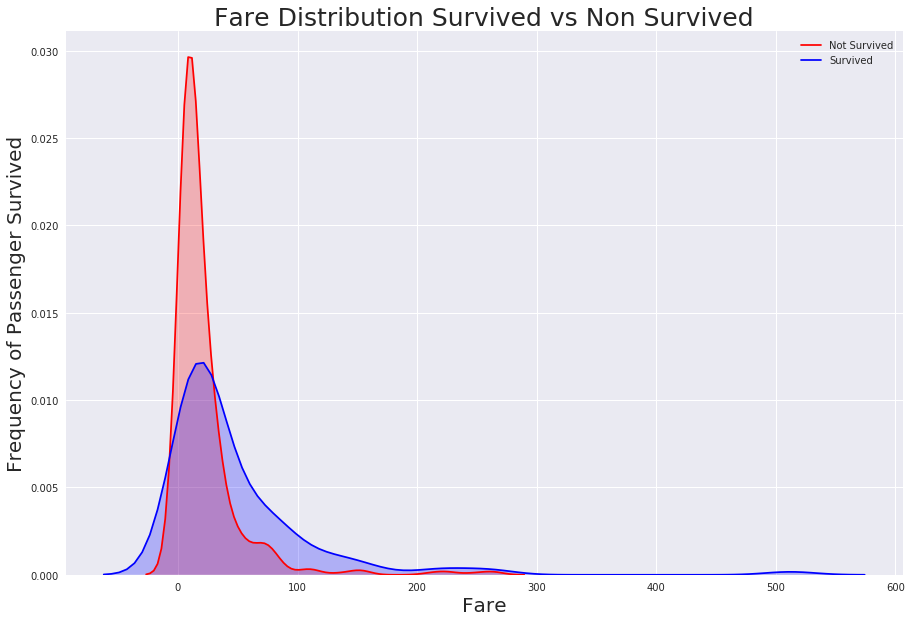

In [7]:
plt.subplots(figsize=(15,10))

ax=sns.kdeplot(train_df.loc[(train_df['Survived'] == 0),'Fare'],color='r',shade=True,label='Not Survived')
ax=sns.kdeplot(train_df.loc[(train_df['Survived'] == 1),'Fare'],color='b',shade=True,label='Survived' )
plt.title('Fare Distribution Survived vs Non Survived',fontsize=25)
plt.ylabel('Frequency of Passenger Survived',fontsize=20)
plt.xlabel('Fare',fontsize=20)

In [8]:
## FAMILY SIZE
train_df['family_size'] = train_df.SibSp + train_df.Parch + 1
test_df['family_size'] = test_df.SibSp + test_df.Parch + 1

def familyGroup(size):
    a = ''
    
    if size <= 1:
        a = 'loner'
    elif size <= 4:
        a = 'small'
    else:
        a = 'large'
        
    return a

train_df['family_group'] = train_df['family_size'].map(familyGroup)
test_df['family_group'] = test_df['family_size'].map(familyGroup)

train_df['is_alone'] = [1 if i < 2 else 0 for i in train_df.family_size]
test_df['is_alone'] = [1 if i < 2 else 0 for i in test_df.family_size]

train_df['child'] = [1 if i < 16 else 0 for i in train_df.Age]
test_df['child'] = [1 if i < 16 else 0 for i in test_df.Age]

train_df.child.value_counts()

train_df['calculated_fare'] = train_df.Fare/train_df.family_size
test_df['calculated_fare'] = test_df.Fare/test_df.family_size

def fareGroup(fare):
    a= ''
    if fare <= 4:
        a = 'Very_low'
    elif fare <= 10:
        a = 'low'
    elif fare <= 20:
        a = 'mid'
    elif fare <= 45:
        a = 'high'
    else:
        a = "very_high"
    return a

train_df['fare_group'] = train_df['calculated_fare'].map(fareGroup)
test_df['fare_group'] = test_df['calculated_fare'].map(fareGroup)

train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,family_size,family_group,is_alone,child,calculated_fare,fare_group
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,small,0,0,3.62500,Very_low
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,small,0,0,35.64165,high
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,loner,1,0,7.92500,low
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs,2,small,0,0,26.55000,high
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr,1,loner,1,0,8.05000,low


In [9]:
train_df_new = pd.get_dummies(train_df, columns=['Title',"Pclass",'Embarked', 'family_group', 'fare_group'], drop_first=True)

train_df_new.head()
test_df_new = pd.get_dummies(test_df, columns=['Title',"Pclass",'Embarked', 'family_group', 'fare_group'], drop_first=True)
train_df_new.drop(['Cabin', 'family_size','Ticket','Name', 'Fare'], axis=1, inplace=True)
# train_df_new.head()
test_df_new.drop(['Ticket','Name','family_size',"Fare",'Cabin'], axis=1, inplace=True)
pd.options.display.max_columns = 99

def ageGroupFun(age):
    a = ''
    if age <= 1:
        a = 'infant'
    elif age <= 4: 
        a = 'toddler'
    elif age <= 13:
        a = 'child'
    elif age <= 18:
        a = 'teenager'
    elif age <= 35:
        a = 'Young_Adult'
    elif age <= 45:
        a = 'adult'
    elif age <= 55:
        a = 'middle_aged'
    elif age <= 65:
        a = 'senior_citizen'
    else:
        a = 'old'
    return a

train_df_new['age_group'] = train_df['Age'].map(ageGroupFun)
test_df_new['age_group'] = test_df['Age'].map(ageGroupFun)

# train_df_new.head()
# test_df_new.head()


In [10]:
# train_df.head()
train_df_new_2 = pd.get_dummies(train_df_new, columns=['age_group'], drop_first=True)
test_df_new_2 = pd.get_dummies(test_df_new, columns=['age_group'], drop_first=True)
# train_df_new_2.head()
# #Lets try all after dropping few of the column.
train_df_new_2.drop(['Age','calculated_fare'],axis=1,inplace=True)
test_df_new_2.drop(['Age','calculated_fare'],axis=1,inplace=True)

# train_df_new_2.drop(['Title_Rev','age_group_old','age_group_teenager','age_group_senior_citizen','Embarked_Q'],axis=1,inplace=True)
# test_df_new_2.drop(['Title_Rev','age_group_old','age_group_teenager','age_group_senior_citizen','Embarked_Q'],axis=1,inplace=True)

train_df_new_2.drop(['Title_Rev','age_group_old','age_group_teenager'],axis=1,inplace=True)
test_df_new_2.drop(['Title_Rev','age_group_old','age_group_teenager'],axis=1,inplace=True)

# train_df_new_2.head()

X = train_df_new_2.drop('Survived', 1)
y = train_df_new_2['Survived']


# BUILD MODEL



In [11]:
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    svm.SVC(probability=True),
    DecisionTreeClassifier(),
    XGBClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]
    


log_cols = ["Classifier", "Accuracy"]
log= pd.DataFrame(columns=log_cols)

SSplit = StratifiedShuffleSplit(test_size=0.3, random_state=7)
acc_dict = {}

for train_index,test_index in SSplit.split(X,y):
    X_train,X_test=X.iloc[train_index],X.iloc[test_index]
    y_train,y_test=y.iloc[train_index],y.iloc[test_index]
    
    for clf in classifiers:
        name = clf.__class__.__name__
          
        clf.fit(X_train,y_train)
        predict=clf.predict(X_test)
        acc=accuracy_score(y_test,predict)
        if name in acc_dict:
            acc_dict[name]+=acc
        else:
            acc_dict[name]=acc

log['Classifier']=acc_dict.keys()
log['Accuracy']=acc_dict.values()



/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discr

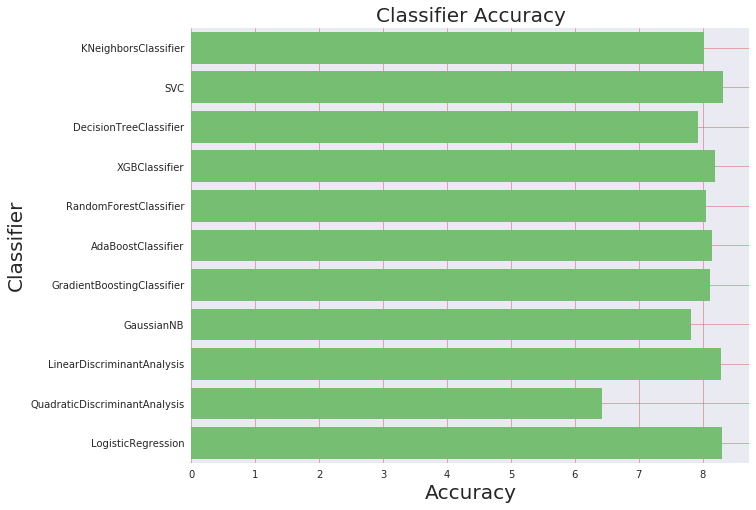

In [12]:
%matplotlib inline
sns.set_color_codes("muted")
ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(y='Classifier', x='Accuracy', data=log, color='g')
# ax.set_xlabel('Accuracy', fontsize=20)
# ax.set_ylabel('Classifier', fontsize=20)
plt.xlabel('Accuracy', fontsize=20)
plt.ylabel('Classifier',fontsize=20)
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.title('Classifier Accuracy',fontsize=20)